In [4]:
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import tensorflow as tf
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
url = "http://127.0.0.1:5000/v1/resources/query/"

payload="{\n    \"Collection\": \"IB\"," \
        "\n    \"StartTime\": \"2020-08-10 00:00:00\"," \
        "\n    \"EndTime\": \"2020-09-14 00:00:00\"\n}"

headers = {
  'Content-Type': 'application/json'
}

In [6]:
def read_data(url, payload, headers):
    response = requests.request("GET", url, headers=headers, data=payload)
    resp_dict = json.loads(response.text)
    resp_array = resp_dict['result']
    data = pd.json_normalize(resp_array)
    return data

In [5]:
df = read_data(url, payload, headers)

In [14]:
df = pd.read_csv("IB_indexed.csv")

In [15]:
df = df.set_index(['UploadTime'])
df.index = pd.to_datetime(df.index)
df.to_csv("IB_indexed.csv")

In [9]:
display(df)

,ColdTemp,ColdTemp_Insulation,ColdTemp_Insulation_High,ColdTemp_Insulation_Low,Cold_Valve,Consumption,Cooling,Current,Device_ID,ErrorCode,...,TimeStamp,Usage_CC,Usage_L,Usage_MT,UserName,WarmTemp,WarmTemp_Insulation,Warm_Valve,WaterLevel,_id.$oid
UploadTime,,,,,,,,,,,,,,,,,,,,,
2020-08-10 00:00:01,16.0,20,21,15,0,NaN,0,NaN,IB_05_01,0,...,1596988801312,163.0,298.0,46.0,sc_user001,35.0,NaN,0,15,5f301d819cddf110824dbae9
2020-08-10 00:00:01,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988801246,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301d829cddf110824dbc42
2020-08-10 00:00:02,18.0,20,21,15,0,NaN,0,NaN,IB_04_01,0,...,1596988802284,116.0,925.0,86.0,sc_user001,34.0,NaN,0,15,5f301d839cddf110824dbdd3
2020-08-10 00:00:30,16.0,20,21,15,0,NaN,0,NaN,IB_05_01,0,...,1596988830874,163.0,298.0,46.0,sc_user001,34.0,NaN,0,15,5f301d9f9cddf110824dca9b
2020-08-10 00:00:27,18.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1596988827289,402.0,916.0,56.0,sc_user001,32.0,NaN,0,22,5f301da09cddf110824dcc25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-13 23:59:30,16.0,20,21,15,0,NaN,0,NaN,IB_05_01,0,...,1600012770943,389.0,514.0,46.0,sc_user001,32.0,NaN,0,15,5f5e41e3a93bea016fcf80c1
2020-09-13 23:59:31,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012771962,228.0,254.0,57.0,sc_user001,32.0,NaN,0,22,5f5e41e4a93bea016fcf83d7
2020-09-13 23:59:02,17.0,20,21,15,0,NaN,0,NaN,IB_03_01,0,...,1600012742230,NaN,NaN,NaN,sc_user001,32.0,NaN,0,22,5f5e41e4a93bea016fcf8423


In [10]:
description = df.describe().transpose()
display(description)

,count,mean,std,min,25%,50%,75%,max
ColdTemp,485643.0,1.968746e+01,1.217554e+01,1.200000e+01,1.500000e+01,1.700000e+01,2.000000e+01,1.020000e+02
ColdTemp_Insulation,485643.0,2.000000e+01,0.000000e+00,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01
ColdTemp_Insulation_High,485643.0,2.100000e+01,0.000000e+00,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01,2.100000e+01
ColdTemp_Insulation_Low,485643.0,1.500000e+01,0.000000e+00,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01,1.500000e+01
Cold_Valve,485643.0,2.421532e-03,4.914950e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Consumption,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cooling,485643.0,3.937872e-02,1.944945e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Current,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ErrorCode,485643.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Filter_Hint,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


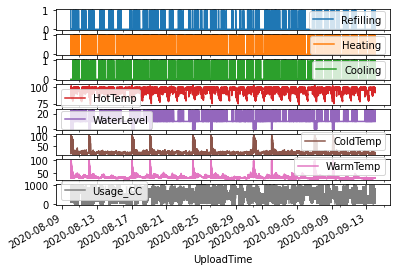

In [16]:
plot_cols = ['Refilling', 'Heating', 'Cooling',
                 'HotTemp', 'WaterLevel', 'ColdTemp', 'WarmTemp', 'Usage_CC']
plot_features = df[plot_cols]
plot_features.index = df.index
_ = plot_features.plot(subplots=True)
plt.show()

In [21]:
df_cc_resample = df.Usage_CC.resample('h').sum()

In [22]:
display(df_cc_resample)

UploadTime
2020-08-10 00:00:00     98754.0
2020-08-10 01:00:00    216580.0
2020-08-10 02:00:00    224280.0
2020-08-10 03:00:00    224280.0
2020-08-10 04:00:00    224164.0
                         ...   
2020-09-13 19:00:00    231078.0
2020-09-13 20:00:00    171252.0
2020-09-13 21:00:00    171480.0
2020-09-13 22:00:00    170635.0
2020-09-13 23:00:00     93794.0
Freq: H, Name: Usage_CC, Length: 840, dtype: float64

In [24]:
# column_indices = {name: i for i, name in enumerate(df_cc_resample.columns)}

n = len(df_cc_resample)
train_df = df_cc_resample[0:int(n*0.7)]
val_df = df_cc_resample[int(n*0.7):int(n*0.9)]
test_df = df_cc_resample[int(n*0.9):]

# num_features = df_cc_resample.shape[1]

In [25]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [27]:
class WindowGenerator:
    def __init__(self, input_width, label_width, shift,
                 train_df=train_df, val_df=val_df, test_df=test_df,
                 label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                          enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])

In [27]:
# violin plotfor df with every column
"""
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

plt.show()
"""

"\ndf_std = (df - train_mean) / train_std\ndf_std = df_std.melt(var_name='Column', value_name='Normalized')\nplt.figure(figsize=(12, 6))\nax = sns.violinplot(x='Column', y='Normalized', data=df_std)\n_ = ax.set_xticklabels(df.keys(), rotation=90)\n\nplt.show()\n"

In [19]:
# for cyclical encoding
timestamp_s = df_cc_resample.index.map(datetime.datetime.timestamp)

In [20]:
# converts time to two features representing cyclical time
day = 24*60*60
week = 7*day

df_cc_resample["day_cos"] = np.cos(timestamp_s * (2 * np.pi / day))
df_cc_resample["day_sin"] = np.sin(timestamp_s * (2 * np.pi / day))
df_cc_resample["week_cos"] = np.cos(timestamp_s * (2 * np.pi / week))
df_cc_resample["week_sin"] = np.sin(timestamp_s * (2 * np.pi / week))

In [28]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

In [36]:
def plot(self, model=None, plot_col='Usage_CC', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(3, 1, n + 1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                 label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index

        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                    edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                        marker='X', edgecolors='k', label='Predictions',
                        c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()

    plt.xlabel('Time [h]')
    plt.show()

In [37]:
WindowGenerator.plot = plot
WindowGenerator.split_window = split_window

# make 24h offset prediction based on 24hs of data
w1 = WindowGenerator(input_width=24, label_width=1, shift=24, label_columns=['Usage_CC'])

# make 1h offset prediction based on 6hs of data
w2 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['Usage_CC'])

# Example: Stack three slices, the length of the total window:
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100 + w2.total_window_size]),
                           np.array(train_df[200:200 + w2.total_window_size])])

example_inputs, example_labels = w2.split_window(example_window)

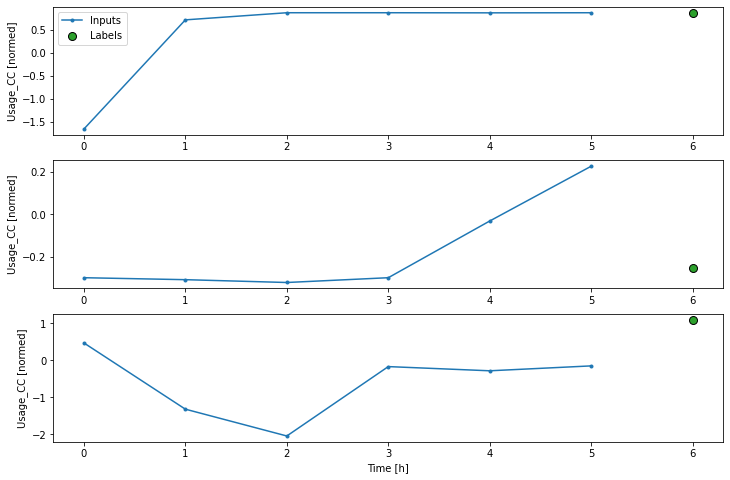

In [38]:
w2.example = example_inputs, example_labels
w2.plot()

In [39]:
def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=True,
        batch_size=32, )

    ds = ds.map(self.split_window)

    return ds
WindowGenerator.make_dataset = make_dataset

In [40]:
@property
def train(self):
    return self.make_dataset(self.train_df)


@property
def val(self):
    return self.make_dataset(self.val_df)


@property
def test(self):
    return self.make_dataset(self.test_df)


# add standard example batch for easy access and plotting
@property
def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
        # No example batch was found, so get one from the `.train` dataset
        result = next(iter(self.train))
        # And cache it for next time
        self._example = result
    return result

In [41]:
WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [45]:
# print(w2.train.element_spec)

single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1, label_columns=['Usage_CC'])
# print(single_step_window)

In [46]:
# instantiate and evaluate model
baseline = Baseline(label_index=column_indices['Usage_CC'])

baseline.compile(loss=tf.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)

# for plotting 24h of this model, make wider WindowGenerator
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1, label_columns=['Usage_CC'])

6/6 [==============================] - 0s 585us/step - loss: 0.3941 - mean_absolute_error: 0.4066


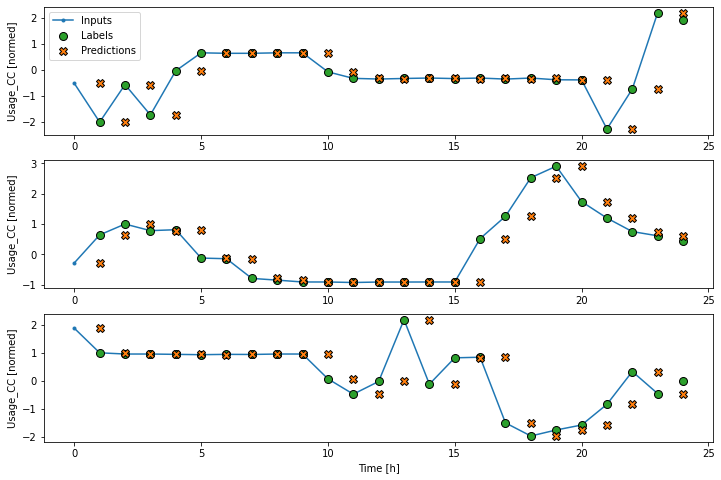

Input shape: (32, 1, 29)
Output shape: (32, 1, 1)


In [48]:
# print(wide_window)

# print('Input shape:', wide_window.example[0].shape)
# print('Output shape:', baseline(wide_window.example[0]).shape)

# plot the wide window for baseline
wide_window.plot(baseline)

# linear model
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1)
])

print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', linear(single_step_window.example[0]).shape)

In [59]:
def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [55]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

NameError: name 'compile_and_fit' is not defined

In [56]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

NameError: name 'compile_and_fit' is not defined

In [60]:
OUT_STEPS = 24

multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)

NameError: name 'multi_window' is not defined